<a href="https://colab.research.google.com/github/AllysonAbreu/dw_contas_publicas_2022/blob/master/dea_receitas_dados_novos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e instalações

In [ ]:
# instalações das bibliotecas
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import basedosdados as bd
from google.colab import auth
from google.cloud import bigquery

# Imports dos dados

## Login no gcloud

In [ ]:
auth.authenticate_user()

project = 'dados-ibge-384913'
location = 'US'
client = bigquery.Client(project=project, location=location)

## Querys para buscar no firebase

In [ ]:
query_populacao = "SELECT db.ano, db.populacao FROM `basedosdados.br_ibge_populacao.municipio` as db WHERE db.id_municipio = '2503704'"

## Import dos dados do IBGE

In [ ]:
# Para carregar os dados do firebase direto no pandas
df_ibge_populacao = client.query(query_populacao).to_dataframe()

## Import dos dados em .csv

In [ ]:
df_receitas = pd.read_csv('dados_receitas.csv', sep=';')
df_receitas.head(1)

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal


## Conversões nos dados

### Conversão e tratamento dos dados da coluna tempo do DF dados_receitas

In [ ]:
# dados antes da conversão
df_receitas.dtypes

COD_RECEITA           int64
DATA                 object
COD_CONTRIBUINTE     object
VALOR_ARRECADADO    float64
FONTE_DADOS          object
dtype: object

In [ ]:
# dados após a conversão
df_receitas['DATA'] = pd.to_datetime(df_receitas['DATA'])
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

### Conversão na coluna ano do DF df_ibge_populacao

In [ ]:
# dados originais
df_ibge_populacao.dtypes

ano          int64
populacao    int64
dtype: object

In [ ]:
# dados apos conversao para dt
df_ibge_populacao['ano'] = pd.to_datetime(df_ibge_populacao['ano'], format='%Y')
df_ibge_populacao

,ano,populacao
0,1991-01-01,51273
1,1992-01-01,51530
2,1993-01-01,51965
3,1994-01-01,52279
4,1995-01-01,52586
5,1996-01-01,51396
6,1997-01-01,51575
7,1998-01-01,51726
8,1999-01-01,51878
9,2000-01-01,54715


In [ ]:
# dados apos a conversao
df_ibge_populacao.dtypes

ano          datetime64[ns]
populacao             int64
dtype: object

# Análises

## Visual - Plot dos gráficos

### Time series da população cajezeirense entre 1991 e 2021

In [ ]:
df_ibge_populacao_index_ano = df_ibge_populacao.set_index('ano')

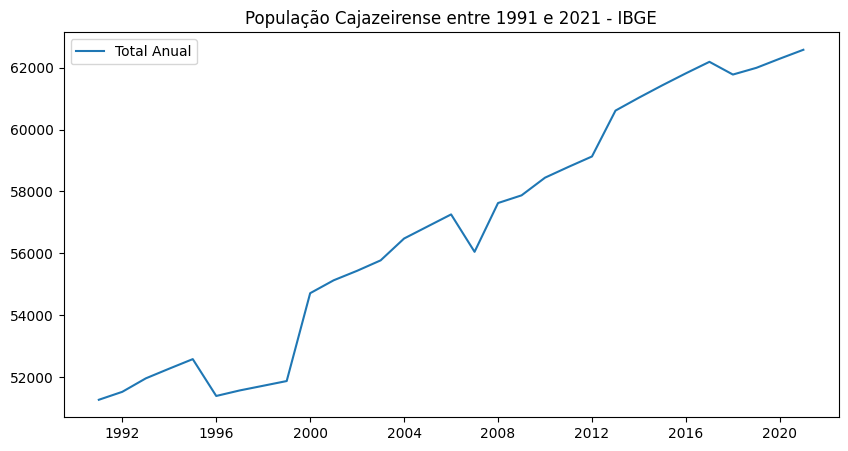

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['populacao'], label='Total Anual')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('População Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [ ]:
df_ibge_populacao_index_ano['variacao_anual'] = df_ibge_populacao_index_ano['populacao'].diff()
df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'] = ((df_ibge_populacao_index_ano['variacao_anual'] / df_ibge_populacao_index_ano['populacao'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano['aceleracao_variacao_anual'] = df_ibge_populacao_index_ano['variacao_anual'].diff()
df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'] = ((df_ibge_populacao_index_ano['aceleracao_variacao_anual'] / df_ibge_populacao_index_ano['variacao_anual'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano

,populacao,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1991-01-01,51273,NaN,NaN,NaN,NaN
1992-01-01,51530,257.0,0.50,NaN,NaN
1993-01-01,51965,435.0,0.84,178.0,69.26
1994-01-01,52279,314.0,0.60,-121.0,-27.82
1995-01-01,52586,307.0,0.59,-7.0,-2.23
1996-01-01,51396,-1190.0,-2.26,-1497.0,-487.62
1997-01-01,51575,179.0,0.35,1369.0,-115.04
1998-01-01,51726,151.0,0.29,-28.0,-15.64
1999-01-01,51878,152.0,0.29,1.0,0.66


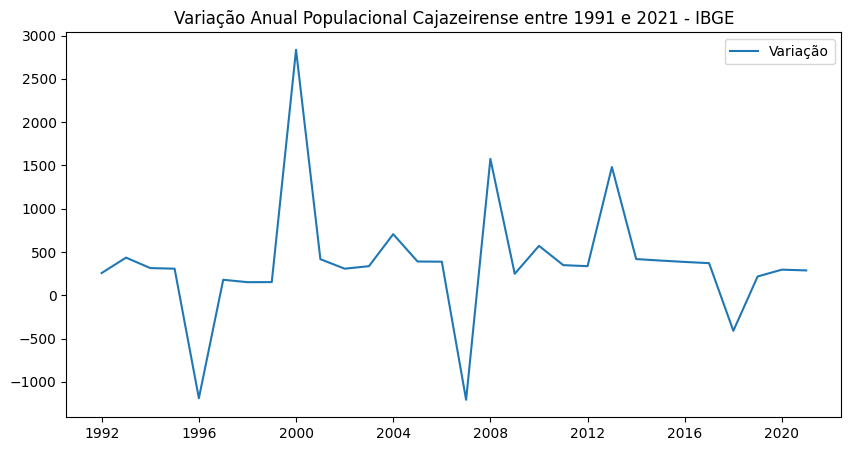

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['variacao_anual'], label='Variação')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

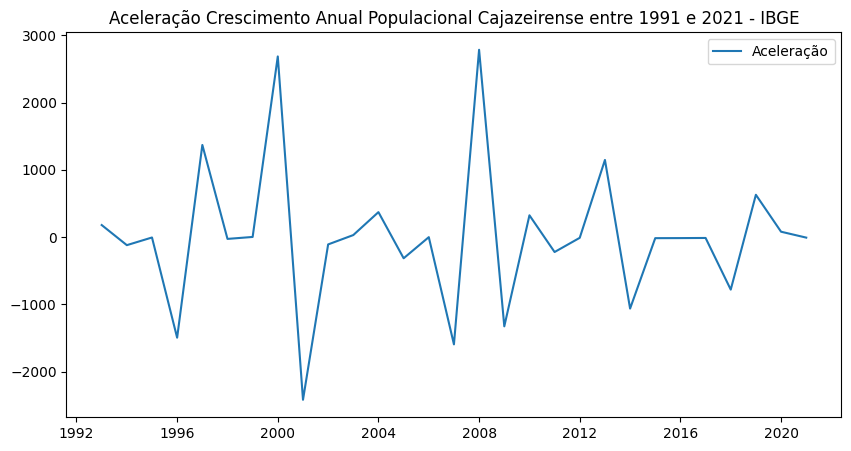

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['aceleracao_variacao_anual'], label='Aceleração')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração Crescimento Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [ ]:
df_ibge_populacao_index_ano['variacao_anual'].sum()

11303.0

In [ ]:
df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()

30.0

In [ ]:
(df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum()).round(2)

20.25

In [ ]:
media_aceleracao = ((df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum())/df_ibge_populacao_index_ano.shape[0]).round(2)
media_aceleracao

14.18

### Time series das receitas por ano

In [ ]:
# verificando se há valores nulos
df_receitas.isna().value_counts()

COD_RECEITA  DATA   COD_CONTRIBUINTE  VALOR_ARRECADADO  FONTE_DADOS
False        False  False             False             False          102293
dtype: int64

In [ ]:
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

In [ ]:
# criando df para analises dos dados
df_receitas_analise = df_receitas[['DATA','VALOR_ARRECADADO']]

# criando coluna mês-ano para agrupar os dados
df_receitas_analise['mes_ano'] = pd.to_datetime(df_receitas_analise['DATA'].dt.strftime("%m-%Y"))

# agrupando os dados no df e deletando coluna das datas
df_receitas_analise.drop(columns=('DATA'), inplace=True)
df_receitas_analise = df_receitas_analise.groupby('mes_ano').sum()
df_receitas_analise

,VALOR_ARRECADADO
mes_ano,
2013-01-01,5865563.10
2013-02-01,6979863.94
2013-03-01,6038308.84
2013-04-01,6036720.77
2013-05-01,6566028.25
...,...
2022-08-01,15546474.80
2022-09-01,14755666.11
2022-10-01,13494171.35


In [169]:
df_receitas_analise['variacao_mensal'] = df_receitas_analise['VALOR_ARRECADADO'].diff()
df_receitas_analise['porcentagem_variacao_mensal_%'] = ((df_receitas_analise['variacao_mensal'] / df_receitas_analise['VALOR_ARRECADADO'].shift(1)) * 100).round(2)
df_receitas_analise['aceleracao_variacao_mensal'] = df_receitas_analise['variacao_mensal'].diff()
df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'] = ((df_receitas_analise['aceleracao_variacao_mensal'] / df_receitas_analise['variacao_mensal'].shift(1)) * 100).round(2)
df_receitas_analise

,VALOR_ARRECADADO,variacao_mensal,porcentagem_variacao_mensal_%,aceleracao_variacao_mensal,porcentagem_aceleracao_variacao_mensal_%
mes_ano,,,,,
2013-01-01,5865563.10,NaN,NaN,NaN,NaN
2013-02-01,6979863.94,1114300.84,19.00,NaN,NaN
2013-03-01,6038308.84,-941555.10,-13.49,-2055855.94,-184.50
2013-04-01,6036720.77,-1588.07,-0.03,939967.03,-99.83
2013-05-01,6566028.25,529307.48,8.77,530895.55,-33430.24
...,...,...,...,...,...
2022-08-01,15546474.80,-5207873.52,-25.09,-1413654.65,37.26
2022-09-01,14755666.11,-790808.69,-5.09,4417064.83,-84.82
2022-10-01,13494171.35,-1261494.76,-8.55,-470686.07,59.52


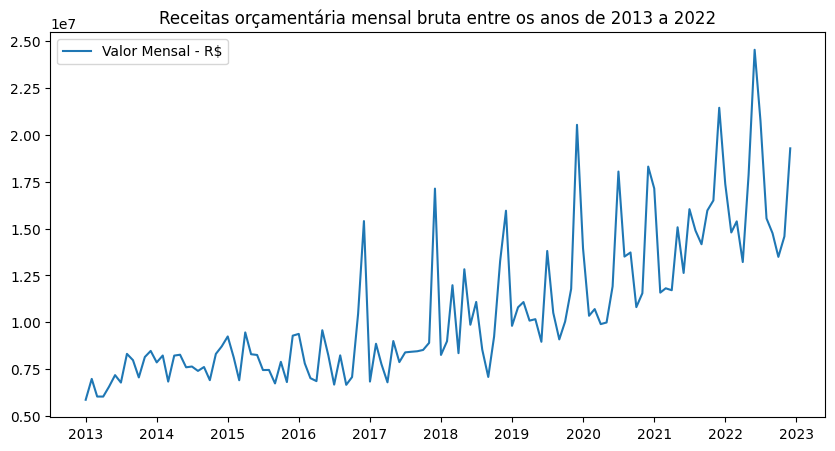

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['VALOR_ARRECADADO'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

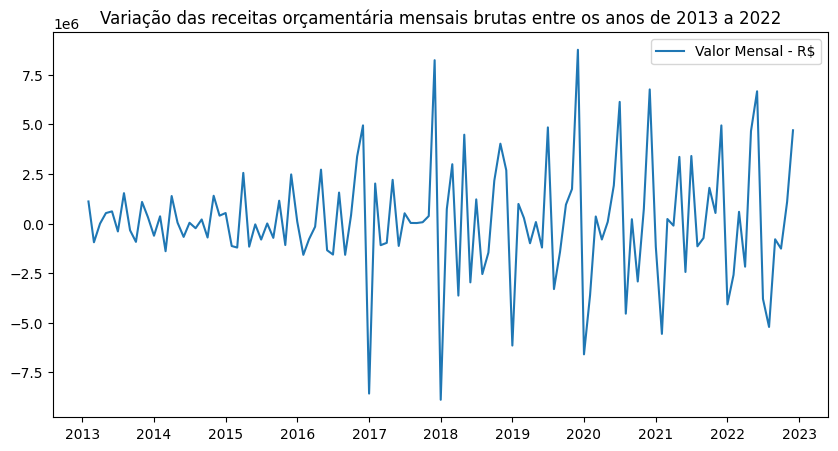

In [170]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

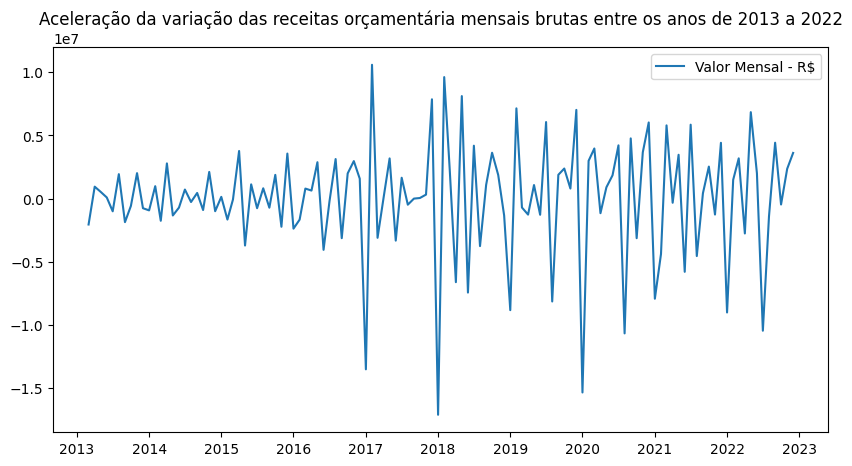

In [171]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['aceleracao_variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()